In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic
import math

In [5]:
list_data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [6]:
df = pd.DataFrame(list_data)
df['unique_id'] = df['unique_id'].astype('category')
df['date_time_of_pickup'] = df['date_time_of_pickup'].astype('category')
df = df.drop("unique_id", axis=1)
df = df.drop("date_time_of_pickup", axis=1)

In [7]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df.shape

(50000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


In [10]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [11]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


<Axes: >

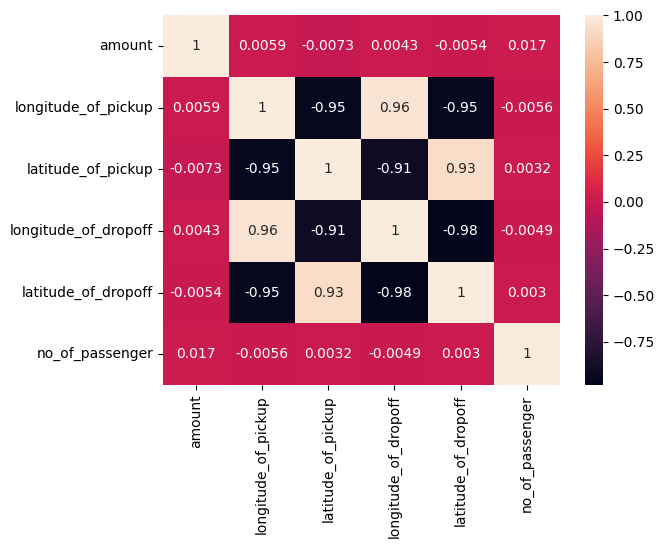

In [13]:
sns.histplot(data=df, x=df["amount"])
sns.heatmap(df.corr(), annot=True)

In [14]:
def get_distance_km(latt1, long1, latt2, long2):
    if ((latt1 > -90 and latt1 < 90) and (latt2 > -90 and latt2 < 90)):
        p_point = (latt1, long1)
        d_point = (latt2, long2)
        distance_km = geodesic(p_point, d_point).km
        return distance_km

In [15]:
df_len = len(df)
distances_km = []
for i in range(len(df)):
    distance = get_distance_km(df.iloc[i, df.columns.get_loc('latitude_of_pickup')], df.iloc[i, df.columns.get_loc(
        'longitude_of_pickup')], df.iloc[i, df.columns.get_loc('latitude_of_dropoff')], df.iloc[i, df.columns.get_loc('longitude_of_dropoff')])
    distances_km.append(distance)
df["distance"] = distances_km


In [16]:
y = df["amount"]
x = df.drop("amount", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)
df_train = xgb.DMatrix(x_train, label=y_train)
df_test = xgb.DMatrix(x_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 0,
    'seed': 3
}
num_round = 100
model = xgb.train(params, df_train, num_round)

In [17]:
prdi = model.predict(df_test)

In [18]:
rmse = math.sqrt(mean_squared_error(y_test, prdi))

In [19]:
print("----", rmse, "----")

---- 4.314046069256839 ----
